## Loading Train and Test Data from the 3 Classes

Displaying sample training images:
Training set size: 225
Testing set size: 75


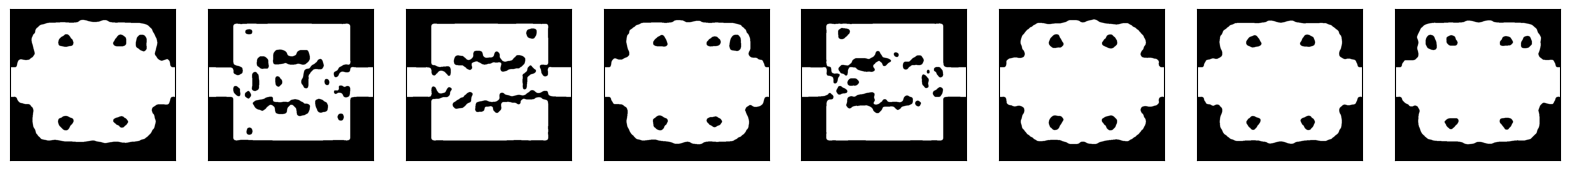

In [42]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Function to load grayscale images without resizing
def load_grayscale_images(path, label):
    """
    Loads grayscale images from the given path without resizing and assigns labels.

    Parameters:
        path (str): Directory path containing the images.
        label (int): Label for the images.

    Returns:
        images (list): List of image arrays in original size.
        labels (list): List of corresponding labels.
    """
    images = []
    labels = []

    for file in os.listdir(path):
        if file.endswith(".bmp"):  # Process only BMP files
            img_path = os.path.join(path, file)
            img = Image.open(img_path).convert('L')  # Convert to grayscale
            images.append(np.array(img))  # Convert to numpy array
            labels.append(label)  # Assign label

    return images, labels

# Function to display sample grayscale images
def show_grayscale_images(images, num_images=8):
    """
    Displays a few grayscale images from the dataset.

    Parameters:
        images (list): List of grayscale image arrays to display.
        num_images (int): Number of images to display.
    """
    fig, axes = plt.subplots(1, num_images, figsize=(20, 20), subplot_kw={'xticks': [], 'yticks': []})
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i], cmap='gray')  # Use 'gray' colormap for grayscale images

# Folder paths
folder_paths = {
    "no_phase": 'Phase_shifter-new/no_phase/no_phase_first100',
    "pi_by_2_phase": 'Phase_shifter-new/pi_by_2_phase/pi_by_2_phase_first100',
    "zero_phase": 'Phase_shifter-new/zero_phase/zero_phase_first100'
}

# Initialize lists for images and labels
x_train = []
y_train = []
x_test = []
y_test = []

# Load grayscale images and labels for each category without resizing
no_phase_images, no_phase_labels = load_grayscale_images(folder_paths["no_phase"], 0)
pi_by_2_phase_images, pi_by_2_phase_labels = load_grayscale_images(folder_paths["pi_by_2_phase"], 1)
zero_phase_images, zero_phase_labels = load_grayscale_images(folder_paths["zero_phase"], 2)

# Combine images and labels
x_train = no_phase_images + pi_by_2_phase_images + zero_phase_images
y_train = no_phase_labels + pi_by_2_phase_labels + zero_phase_labels

# Convert lists to numpy arrays
x_train = np.array(x_train, dtype="float32") / 255.0  # Normalize grayscale pixel values to [0, 1]
x_train = np.expand_dims(x_train, axis=-1)  # Add a channel dimension for grayscale (e.g., (height, width, 1))
y_train = np.array(y_train, dtype="int")  # Convert labels to numpy array

# Split into training and testing sets (e.g., 75% train, 25% test)
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.25, random_state=16)

# Display a few sample training images
print("Displaying sample training images:")
show_grayscale_images(x_train)
print(f"Training set size: {x_train.shape[0]}")
print(f"Testing set size: {x_test.shape[0]}")


In [33]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the CNN model
model = Sequential()

# First convolutional layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(711, 651, 1)))  # Update input_shape for grayscale
model.add(MaxPooling2D(2, 2))

# Second convolutional layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

# Third convolutional layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

# Fourth convolutional layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

# Flattening and fully connected layers
model.add(Flatten())
model.add(Dense(1024, activation='relu'))  # Fully connected layer
model.add(Dense(3, activation='softmax'))  # Output layer for 3 classes

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model architecture
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 709, 649, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 354, 324, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 352, 322, 128)  │        36,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 176, 161, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 174, 159, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 87, 79, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 85, 77, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 42, 38, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 204288)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1024)           │   209,191,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 3)              │         3,075 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 209,527,491 (799.28 MB)

 Trainable params: 209,527,491 (799.28 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
from tensorflow.keras.utils import to_categorical

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=3)
y_test = to_categorical(y_test, num_classes=3)

# Check the shape of y_train and y_test
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# Train the model
hist = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=10,
    epochs=4
)


y_train shape: (225, 3)
y_test shape: (75, 3)
Epoch 1/4
23/23 ━━━━━━━━━━━━━━━━━━━━ 102s 4s/step - accuracy: 0.6047 - loss: 2.7266 - val_accuracy: 0.6000 - val_loss: 5.6103
Epoch 2/4
23/23 ━━━━━━━━━━━━━━━━━━━━ 85s 4s/step - accuracy: 0.8729 - loss: 1.1496 - val_accuracy: 0.9733 - val_loss: 0.0299
Epoch 3/4
23/23 ━━━━━━━━━━━━━━━━━━━━ 97s 4s/step - accuracy: 0.9986 - loss: 0.0074 - val_accuracy: 0.9867 - val_loss: 0.0333
Epoch 4/4
23/23 ━━━━━━━━━━━━━━━━━━━━ 87s 4s/step - accuracy: 0.9947 - loss: 0.0083 - val_accuracy: 1.0000 - val_loss: 0.0000e+00


### Green Shading - for LIME Explanation

In [ ]:
'''
from lime import lime_image
from skimage.segmentation import mark_boundaries
from skimage.segmentation import felzenszwalb

# Define the prediction function
def predict_fn(images):
    grayscale_images = np.expand_dims(np.mean(images, axis=-1), axis=-1)
    return model.predict(grayscale_images)

# Initialize the explainer
explainer = lime_image.LimeImageExplainer()

# Loop through the test images
for i, image in enumerate(x_test):
    sample_image = cv2.cvtColor((image.squeeze() * 255).astype('uint8'), cv2.COLOR_GRAY2RGB)

    # Run LIME explanation with improved segmentation
    explanation = explainer.explain_instance(
        sample_image.astype('double'),
        predict_fn,
        top_labels=1,
        hide_color=0,
        num_samples=300,
        segmentation_fn=felzenszwalb  # Test with another segmentation method
    )

    # Extract explanation
    temp, mask = explanation.get_image_and_mask(
        explanation.top_labels[0],
        positive_only=False,  # Include both positive and negative contributions
        num_features=10,
        hide_rest=False
    )

    # Visualize
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

    # Original image
    ax1.imshow(sample_image, cmap='gray')
    ax1.set_title(f"Original Image - Label {np.argmax(y_test[i])}")
    ax1.axis('off')

    # Explanation visualization
    ax2.imshow(mark_boundaries(temp, mask, color=(1, 0, 0)))
    ax2.set_title("LIME Explanation (Highlighted Regions)")
    ax2.axis('off')

    plt.tight_layout()
    plt.show()
    '''


'\nfrom lime import lime_image\nfrom skimage.segmentation import mark_boundaries\nfrom skimage.segmentation import felzenszwalb\n\n# Define the prediction function\ndef predict_fn(images):\n    grayscale_images = np.expand_dims(np.mean(images, axis=-1), axis=-1)\n    return model.predict(grayscale_images)\n\n# Initialize the explainer\nexplainer = lime_image.LimeImageExplainer()\n\n# Loop through the test images\nfor i, image in enumerate(x_test):\n    sample_image = cv2.cvtColor((image.squeeze() * 255).astype(\'uint8\'), cv2.COLOR_GRAY2RGB)\n\n    # Run LIME explanation with improved segmentation\n    explanation = explainer.explain_instance(\n        sample_image.astype(\'double\'),\n        predict_fn,\n        top_labels=1,\n        hide_color=0,\n        num_samples=300,\n        segmentation_fn=felzenszwalb  # Test with another segmentation method\n    )\n\n    # Extract explanation\n    temp, mask = explanation.get_image_and_mask(\n        explanation.top_labels[0],\n        pos

### Ideal LIME Explanation

  3%|▎         | 9/300 [00:06<03:37,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 855ms/step


  6%|▋         | 19/300 [00:14<03:37,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 745ms/step


 10%|▉         | 29/300 [00:23<03:24,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 672ms/step


 13%|█▎        | 39/300 [00:31<03:16,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 696ms/step


 16%|█▋        | 49/300 [00:39<03:10,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 791ms/step


 20%|█▉        | 59/300 [00:48<03:03,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 679ms/step


 23%|██▎       | 69/300 [00:56<02:58,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 701ms/step


 26%|██▋       | 79/300 [01:04<02:47,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 664ms/step


 30%|██▉       | 89/300 [01:12<02:43,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 33%|███▎      | 99/300 [01:21<02:36,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 819ms/step


 36%|███▋      | 109/300 [01:30<02:25,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 844ms/step


 40%|███▉      | 119/300 [01:38<02:17,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 782ms/step


 43%|████▎     | 129/300 [01:47<02:10,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 721ms/step


 46%|████▋     | 139/300 [01:55<02:04,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 686ms/step


 50%|████▉     | 149/300 [02:03<01:54,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 651ms/step


 53%|█████▎    | 159/300 [02:11<01:47,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 889ms/step


 56%|█████▋    | 169/300 [02:20<01:38,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 930ms/step


 60%|█████▉    | 179/300 [02:28<01:31,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 677ms/step


 63%|██████▎   | 189/300 [02:36<01:23,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 684ms/step


 66%|██████▋   | 199/300 [02:44<01:15,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 645ms/step


 70%|██████▉   | 209/300 [02:53<01:08,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 650ms/step


 73%|███████▎  | 219/300 [03:01<01:00,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 620ms/step


 76%|███████▋  | 229/300 [03:09<00:57,  1.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 871ms/step


 80%|███████▉  | 239/300 [03:18<00:47,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 83%|████████▎ | 249/300 [03:27<00:40,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 803ms/step


 86%|████████▋ | 259/300 [03:35<00:31,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 774ms/step


 90%|████████▉ | 269/300 [03:44<00:23,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 778ms/step


 93%|█████████▎| 279/300 [03:52<00:16,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 766ms/step


 96%|█████████▋| 289/300 [04:00<00:08,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 699ms/step


100%|█████████▉| 299/300 [04:09<00:00,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 707ms/step


100%|██████████| 300/300 [04:10<00:00,  1.20it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


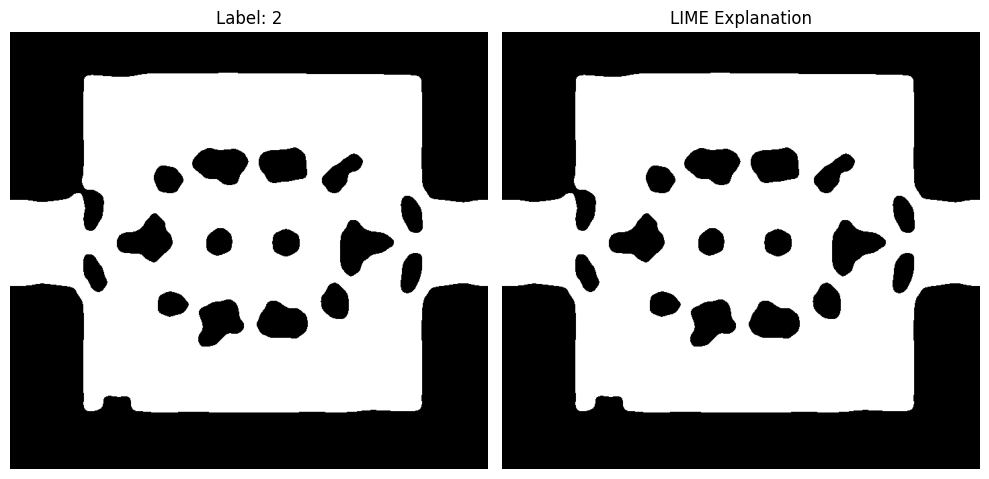

  3%|▎         | 9/300 [00:06<03:44,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 949ms/step


  6%|▋         | 19/300 [00:15<03:39,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 743ms/step


 10%|▉         | 29/300 [00:23<03:29,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 666ms/step


 13%|█▎        | 39/300 [00:31<03:21,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 670ms/step


 16%|█▋        | 49/300 [00:40<03:14,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 682ms/step


 20%|█▉        | 59/300 [00:48<03:09,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 676ms/step


 23%|██▎       | 69/300 [00:57<02:59,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 694ms/step


 26%|██▋       | 79/300 [01:05<02:51,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 957ms/step


 30%|██▉       | 89/300 [01:14<02:46,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 729ms/step


 33%|███▎      | 99/300 [01:22<02:34,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 865ms/step


 36%|███▋      | 109/300 [01:31<02:29,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 875ms/step


 40%|███▉      | 119/300 [01:40<02:20,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 851ms/step


 43%|████▎     | 129/300 [01:48<02:14,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 778ms/step


 46%|████▋     | 139/300 [01:57<02:05,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 710ms/step


 50%|████▉     | 149/300 [02:05<01:56,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 860ms/step


 53%|█████▎    | 159/300 [02:14<01:51,  1.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 737ms/step


 56%|█████▋    | 169/300 [02:23<01:46,  1.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 787ms/step


 60%|█████▉    | 179/300 [02:31<01:34,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 726ms/step


 63%|██████▎   | 189/300 [02:40<01:26,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 899ms/step


 66%|██████▋   | 199/300 [02:49<01:18,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 738ms/step


 70%|██████▉   | 209/300 [02:57<01:09,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 681ms/step


 73%|███████▎  | 219/300 [03:05<01:02,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 718ms/step


 76%|███████▋  | 229/300 [03:14<00:56,  1.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 755ms/step


 80%|███████▉  | 239/300 [03:23<00:48,  1.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 774ms/step


 83%|████████▎ | 249/300 [03:31<00:39,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 859ms/step


 86%|████████▋ | 259/300 [03:40<00:31,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 788ms/step


 90%|████████▉ | 269/300 [03:49<00:24,  1.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 857ms/step


 93%|█████████▎| 279/300 [03:57<00:16,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 806ms/step


 96%|█████████▋| 289/300 [04:06<00:08,  1.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 803ms/step


100%|█████████▉| 299/300 [04:15<00:00,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 746ms/step


100%|██████████| 300/300 [04:16<00:00,  1.17it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


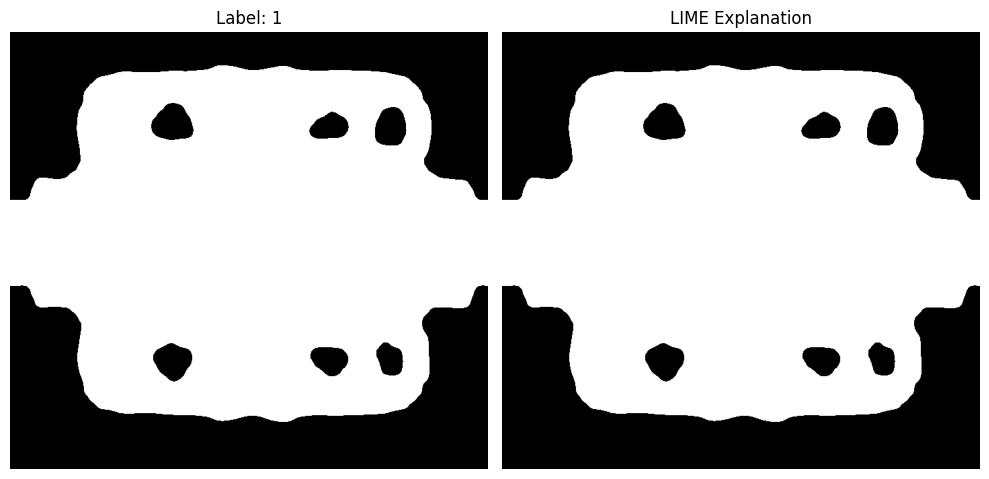

  3%|▎         | 9/300 [00:06<03:34,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 778ms/step


  6%|▋         | 19/300 [00:14<03:35,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 785ms/step


 10%|▉         | 29/300 [00:22<03:31,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 739ms/step


 13%|█▎        | 39/300 [00:31<03:22,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 747ms/step


 16%|█▋        | 49/300 [00:39<03:13,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 834ms/step


 20%|█▉        | 59/300 [00:48<03:07,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 795ms/step


 23%|██▎       | 69/300 [00:56<02:56,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 755ms/step


 26%|██▋       | 79/300 [01:05<02:49,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 684ms/step


 30%|██▉       | 89/300 [01:13<02:39,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 723ms/step


 33%|███▎      | 99/300 [01:21<02:32,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 703ms/step


 36%|███▋      | 109/300 [01:30<02:27,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 660ms/step


 40%|███▉      | 119/300 [01:38<02:20,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 714ms/step


 43%|████▎     | 129/300 [01:46<02:09,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 818ms/step


 46%|████▋     | 139/300 [01:55<02:03,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 723ms/step


 50%|████▉     | 149/300 [02:03<01:55,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 720ms/step


 53%|█████▎    | 159/300 [02:11<01:48,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 711ms/step


 56%|█████▋    | 169/300 [02:20<01:39,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 699ms/step


 60%|█████▉    | 179/300 [02:28<01:32,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 697ms/step


 63%|██████▎   | 189/300 [02:36<01:24,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 695ms/step


 66%|██████▋   | 199/300 [02:45<01:16,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 847ms/step


 70%|██████▉   | 209/300 [02:53<01:10,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 772ms/step


 73%|███████▎  | 219/300 [03:02<01:02,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 736ms/step


 76%|███████▋  | 229/300 [03:10<00:54,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 827ms/step


 80%|███████▉  | 239/300 [03:19<00:47,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 818ms/step


 83%|████████▎ | 249/300 [03:27<00:40,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 785ms/step


 86%|████████▋ | 259/300 [03:36<00:32,  1.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 867ms/step


 87%|████████▋ | 260/300 [03:39<00:33,  1.19it/s]


KeyboardInterrupt: 

In [ ]:
from lime import lime_image
from skimage.segmentation import mark_boundaries
from lime.wrappers.scikit_image import SegmentationAlgorithm
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Define the prediction function compatible with LIME
def predict_fn(images):
    grayscale_images = np.expand_dims(np.mean(images, axis=-1), axis=-1)
    return model.predict(grayscale_images)

# Initialize LIME image explainer
explainer = lime_image.LimeImageExplainer()

# Configure segmentation for finer granularity
segmentation_fn = SegmentationAlgorithm('quickshift', kernel_size=1, max_dist=3, ratio=0.2)

# Loop through test images and display LIME explanations
for i, image in enumerate(x_test):
    # Convert grayscale image to RGB for LIME compatibility
    sample_image = cv2.cvtColor((image.squeeze() * 255).astype('uint8'), cv2.COLOR_GRAY2RGB)

    # Run LIME explanation
    explanation = explainer.explain_instance(
        sample_image.astype('double'),
        predict_fn,
        top_labels=1,  # Show explanation for the top predicted label
        hide_color=0,
        num_samples=300,  # Reduce samples for faster computation
        segmentation_fn=segmentation_fn  # Use custom segmentation
    )

    # Extract explanation image (with mask for highlighted regions)
    temp, mask = explanation.get_image_and_mask(
        explanation.top_labels[0],
        positive_only=True,  # Highlight only positive contributions
        num_features=10,
        hide_rest=False
    )

    # Plot original and explanation images
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

    # Original image
    ax1.imshow(sample_image, cmap='gray')
    ax1.set_title(f"Label: {np.argmax(y_test[i])}")
    ax1.axis('off')

    # LIME explanation (highlighted regions)
    ax2.imshow(mark_boundaries(temp, mask, color=(1, 1, 0)))  # Yellow highlight
    ax2.set_title("LIME Explanation")
    ax2.axis('off')

    # Show the plot
    plt.tight_layout()
    plt.show()


  3%|▎         | 8/300 [00:00<00:10, 27.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 853ms/step


  6%|▌         | 17/300 [00:01<00:26, 10.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 706ms/step


 10%|▉         | 29/300 [00:02<00:21, 12.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 686ms/step


 13%|█▎        | 38/300 [00:03<00:23, 11.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 635ms/step


 16%|█▌        | 47/300 [00:05<00:23, 10.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 645ms/step


 20%|█▉        | 59/300 [00:06<00:18, 13.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 647ms/step


 22%|██▏       | 67/300 [00:07<00:22, 10.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 685ms/step


 26%|██▋       | 79/300 [00:08<00:17, 12.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 638ms/step


 29%|██▉       | 88/300 [00:09<00:18, 11.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 635ms/step


 32%|███▏      | 97/300 [00:10<00:18, 11.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 643ms/step


 36%|███▋      | 109/300 [00:11<00:14, 13.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 643ms/step


 39%|███▉      | 118/300 [00:12<00:15, 11.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 673ms/step


 43%|████▎     | 129/300 [00:14<00:14, 11.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 753ms/step


 46%|████▌     | 137/300 [00:15<00:16, 10.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 668ms/step


 50%|████▉     | 149/300 [00:16<00:11, 12.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 637ms/step


 53%|█████▎    | 158/300 [00:17<00:12, 11.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 713ms/step


 56%|█████▌    | 167/300 [00:18<00:12, 10.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 731ms/step


 60%|█████▉    | 179/300 [00:20<00:09, 12.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 830ms/step


 63%|██████▎   | 188/300 [00:21<00:11,  9.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 711ms/step


 66%|██████▋   | 199/300 [00:22<00:08, 12.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 642ms/step


 69%|██████▉   | 208/300 [00:23<00:08, 11.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 733ms/step


 72%|███████▏  | 217/300 [00:24<00:07, 10.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 913ms/step


 76%|███████▋  | 229/300 [00:26<00:06, 11.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 803ms/step


 79%|███████▉  | 238/300 [00:27<00:06,  9.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 756ms/step


 83%|████████▎ | 249/300 [00:28<00:04, 11.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 641ms/step


 86%|████████▌ | 258/300 [00:29<00:03, 11.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 637ms/step


 89%|████████▉ | 267/300 [00:30<00:03, 10.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 634ms/step


 93%|█████████▎| 279/300 [00:32<00:01, 13.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 630ms/step


 96%|█████████▌| 288/300 [00:33<00:01, 11.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 637ms/step


 99%|█████████▉| 297/300 [00:34<00:00, 11.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 635ms/step


100%|██████████| 300/300 [00:35<00:00,  8.56it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


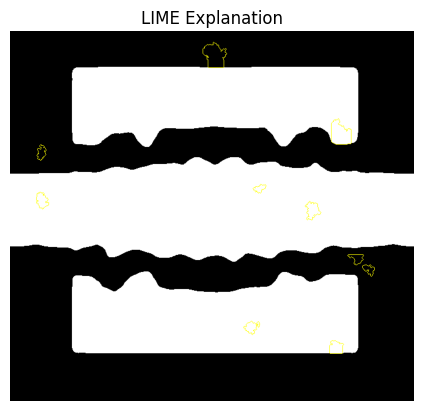

In [ ]:
explanation = explainer.explain_instance(
    sample_image.astype('double'),
    predict_fn,
    top_labels=1,
    hide_color=0,
    num_samples=300
)

temp, mask = explanation.get_image_and_mask(
    explanation.top_labels[0],
    positive_only=True,
    num_features=10,
    hide_rest=False
)

plt.imshow(mark_boundaries(temp, mask, color=(1, 1, 0)))
plt.title("LIME Explanation")
plt.axis('off')
plt.show()


In [ ]:
from skimage.segmentation import mark_boundaries
from lime import lime_image
import matplotlib.pyplot as plt
import numpy as np
import cv2

def predict_fn(images):
    # Ensure images are reshaped to match the model's expected input shape
    images = images[:,:,:,0]  # Extract first channel if LIME passes RGB
    images = images.reshape(images.shape[0], 63, 63, 1)  # Reshape to (63, 63, 1)
    features = model.predict(images)  # Predict features
    return features.reshape(features.shape[0], -1)  # Reshape for LIME compatibility

# Initialize the LIME explainer
explainer = lime_image.LimeImageExplainer()

# Loop through images in the test set (or dataset)
for i, image in enumerate(x_test):  # Assuming x_test contains your test images
    # Prepare the image for LIME (convert to RGB for compatibility)
    sample_image = cv2.cvtColor((image.squeeze() * 255).astype('uint8'), cv2.COLOR_GRAY2RGB)

    # Generate LIME explanation
    explanation = explainer.explain_instance(
        sample_image.astype('double'),  # Image converted to double
        predict_fn,  # Prediction function
        top_labels=1,  # Explain top predicted label
        hide_color=0,
        num_samples=500  # Adjust num_samples for faster processing
    )

    # Extract explanation and mask
    temp, mask = explanation.get_image_and_mask(
        explanation.top_labels[0],  # Top predicted label
        positive_only=True,  # Highlight only positive contributions
        num_features=10,  # Number of regions to highlight
        hide_rest=False  # Do not hide other regions
    )

    # Visualization
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

    # Original image
    ax1.imshow(sample_image, cmap='gray')
    ax1.set_title(f"Original Image - Label: {np.argmax(y_test[i])}")  # Assuming y_test has one-hot encoded labels
    ax1.axis('off')

    # LIME explanation with boundaries
    ax2.imshow(mark_boundaries(temp, mask))
    ax2.set_title("LIME Explanation")
    ax2.axis('off')

    # Mask visualization
    ax3.matshow(mask, cmap='viridis')
    ax3.set_title("Mask Only")
    ax3.axis('off')

    plt.tight_layout()
    plt.show()

    # Optional: Stop after a few images (for debugging)
    if i == 10:
        break


  2%|▏         | 9/500 [00:00<00:21, 23.37it/s]


ValueError: cannot reshape array of size 4628610 into shape (10,63,63,1)

In [ ]:
# Ensure dataset is resized properly
resized_images = []
for image in x_test:  # Assuming x_test contains your test images
    resized_image = cv2.resize(image.squeeze(), (63, 63))  # Resize to (63, 63)
    resized_images.append(np.expand_dims(resized_image / 255.0, axis=-1))  # Normalize and add channel
x_test = np.array(resized_images)

# Check the shape after resizing
print("Shape of resized x_test:", x_test.shape)

# Updated predict_fn
def predict_fn(images):
    images = images[:,:,:,0]  # Extract the first channel if images are RGB
    images = np.expand_dims(images, axis=-1)  # Ensure single channel (grayscale)
    features = model.predict(images)  # Make predictions
    return features.reshape(features.shape[0], -1)  # Reshape for LIME compatibility

# Example LIME usage
explainer = lime_image.LimeImageExplainer()
sample_image = cv2.cvtColor((x_test[0].squeeze() * 255).astype('uint8'), cv2.COLOR_GRAY2RGB)

explanation = explainer.explain_instance(
    sample_image.astype('double'),
    predict_fn,
    top_labels=1,
    hide_color=0,
    num_samples=500
)


Shape of resized x_test: (75, 63, 63, 1)


  0%|          | 0/500 [00:00<?, ?it/s]2024-11-18 19:03:21.438076: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: Matrix size-incompatible: In[0]: [10,512], In[1]: [204288,1024]
	 [[{{node sequential_1_1/dense_2_1/MatMul}}]]
  2%|▏         | 9/500 [00:00<00:05, 83.57it/s]


InvalidArgumentError: Graph execution error:

Detected at node sequential_1_1/dense_2_1/MatMul defined at (most recent call last):
  File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/runpy.py", line 197, in _run_module_as_main

  File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/runpy.py", line 87, in _run_code

  File "/Users/nayanthara/Library/Python/3.9/lib/python/site-packages/ipykernel_launcher.py", line 17, in <module>

  File "/Users/nayanthara/Library/Python/3.9/lib/python/site-packages/traitlets/config/application.py", line 1053, in launch_instance

  File "/Users/nayanthara/Library/Python/3.9/lib/python/site-packages/ipykernel/kernelapp.py", line 737, in start

  File "/Users/nayanthara/Library/Python/3.9/lib/python/site-packages/tornado/platform/asyncio.py", line 195, in start

  File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/asyncio/base_events.py", line 596, in run_forever

  File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/asyncio/base_events.py", line 1890, in _run_once

  File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/asyncio/events.py", line 80, in _run

  File "/Users/nayanthara/Library/Python/3.9/lib/python/site-packages/ipykernel/kernelbase.py", line 524, in dispatch_queue

  File "/Users/nayanthara/Library/Python/3.9/lib/python/site-packages/ipykernel/kernelbase.py", line 513, in process_one

  File "/Users/nayanthara/Library/Python/3.9/lib/python/site-packages/ipykernel/kernelbase.py", line 418, in dispatch_shell

  File "/Users/nayanthara/Library/Python/3.9/lib/python/site-packages/ipykernel/kernelbase.py", line 758, in execute_request

  File "/Users/nayanthara/Library/Python/3.9/lib/python/site-packages/ipykernel/ipkernel.py", line 426, in do_execute

  File "/Users/nayanthara/Library/Python/3.9/lib/python/site-packages/ipykernel/zmqshell.py", line 549, in run_cell

  File "/Users/nayanthara/Library/Python/3.9/lib/python/site-packages/IPython/core/interactiveshell.py", line 3046, in run_cell

  File "/Users/nayanthara/Library/Python/3.9/lib/python/site-packages/IPython/core/interactiveshell.py", line 3101, in _run_cell

  File "/Users/nayanthara/Library/Python/3.9/lib/python/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/Users/nayanthara/Library/Python/3.9/lib/python/site-packages/IPython/core/interactiveshell.py", line 3306, in run_cell_async

  File "/Users/nayanthara/Library/Python/3.9/lib/python/site-packages/IPython/core/interactiveshell.py", line 3488, in run_ast_nodes

  File "/Users/nayanthara/Library/Python/3.9/lib/python/site-packages/IPython/core/interactiveshell.py", line 3548, in run_code

  File "/var/folders/qw/p8rpb13x5xdcc1g501wf9mdw0000gn/T/ipykernel_817/3631916134.py", line 22, in <module>

  File "/Users/nayanthara/Library/Python/3.9/lib/python/site-packages/lime/lime_image.py", line 198, in explain_instance

  File "/Users/nayanthara/Library/Python/3.9/lib/python/site-packages/lime/lime_image.py", line 261, in data_labels

  File "/var/folders/qw/p8rpb13x5xdcc1g501wf9mdw0000gn/T/ipykernel_817/3631916134.py", line 15, in predict_fn

  File "/Users/nayanthara/Library/Python/3.9/lib/python/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/Users/nayanthara/Library/Python/3.9/lib/python/site-packages/keras/src/backend/tensorflow/trainer.py", line 512, in predict

  File "/Users/nayanthara/Library/Python/3.9/lib/python/site-packages/keras/src/backend/tensorflow/trainer.py", line 208, in one_step_on_data_distributed

  File "/Users/nayanthara/Library/Python/3.9/lib/python/site-packages/keras/src/backend/tensorflow/trainer.py", line 198, in one_step_on_data

  File "/Users/nayanthara/Library/Python/3.9/lib/python/site-packages/keras/src/backend/tensorflow/trainer.py", line 96, in predict_step

  File "/Users/nayanthara/Library/Python/3.9/lib/python/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/Users/nayanthara/Library/Python/3.9/lib/python/site-packages/keras/src/layers/layer.py", line 901, in __call__

  File "/Users/nayanthara/Library/Python/3.9/lib/python/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/Users/nayanthara/Library/Python/3.9/lib/python/site-packages/keras/src/ops/operation.py", line 46, in __call__

  File "/Users/nayanthara/Library/Python/3.9/lib/python/site-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler

  File "/Users/nayanthara/Library/Python/3.9/lib/python/site-packages/keras/src/models/sequential.py", line 212, in call

  File "/Users/nayanthara/Library/Python/3.9/lib/python/site-packages/keras/src/models/functional.py", line 175, in call

  File "/Users/nayanthara/Library/Python/3.9/lib/python/site-packages/keras/src/ops/function.py", line 171, in _run_through_graph

  File "/Users/nayanthara/Library/Python/3.9/lib/python/site-packages/keras/src/models/functional.py", line 560, in call

  File "/Users/nayanthara/Library/Python/3.9/lib/python/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/Users/nayanthara/Library/Python/3.9/lib/python/site-packages/keras/src/layers/layer.py", line 901, in __call__

  File "/Users/nayanthara/Library/Python/3.9/lib/python/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/Users/nayanthara/Library/Python/3.9/lib/python/site-packages/keras/src/ops/operation.py", line 46, in __call__

  File "/Users/nayanthara/Library/Python/3.9/lib/python/site-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler

  File "/Users/nayanthara/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py", line 144, in call

  File "/Users/nayanthara/Library/Python/3.9/lib/python/site-packages/keras/src/ops/numpy.py", line 3445, in matmul

  File "/Users/nayanthara/Library/Python/3.9/lib/python/site-packages/keras/src/backend/tensorflow/numpy.py", line 477, in matmul

Matrix size-incompatible: In[0]: [10,512], In[1]: [204288,1024]
	 [[{{node sequential_1_1/dense_2_1/MatMul}}]] [Op:__inference_one_step_on_data_distributed_64262]